# Incomplete
The amenities being loaded in are only "nodes". However, there are also "ways" that contain the outlines of amenities and other features. This needs to be resolved.

OSM Amenities

https://gis.stackexchange.com/questions/220577/is-it-possible-to-get-osm-data-in-geojson-via-overpass-api-using-ipython

In [15]:
import random
import time
import requests
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
# https://stackoverflow.com/questions/23267409/how-to-implement-retry-mechanism-into-python-requests-library
from requests.packages.urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter

def get_overpass_gdf(query_string):
    s = requests.Session()
    retries = Retry(total=5, backoff_factor=2, status_forcelist=[ 502, 503, 504 ])
    s.mount('http://', HTTPAdapter(max_retries=retries))
    # Retrieve URL contents
    r = s.get(query_string)
    print (r)
    if r.status_code == 429:
        sleep_time = 30
        print(f'Oops! Encountered 429, Sleeping for {sleep_time}')
        time.sleep(sleep_time)
        r = s.get(query_string)
    elif r.status_code == 502:
        sleep_time = 30
        print(f'Oops! Encountered 502, Sleeping for {sleep_time}')
        time.sleep(sleep_time)
        r = s.get(query_string)
    elif r.status_code == 504:
        sleep_time = 30
        print(f'Oops! Encountered 504, Sleeping for {sleep_time}')
        time.sleep(sleep_time)
        r = s.get(query_string)
        
    # Make dataframe
    df = pd.DataFrame(r.json()['elements'])


    # Make geodataframe
    df['geometry'] = [Point(xy) for xy in zip(df.lon, df.lat)]
    df = gpd.GeoDataFrame(df, geometry='geometry',crs = 'EPSG:4326')

    return df

def unpack(df, column,amenity, fillna=None):
    ret = None
    ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems()))[[amenity,'name']]], axis=1)
    del ret[column]
    return ret

# Specify query
def construct_osm_query(amenity):
    data = f"""
    [out:json][timeout:25];
    // fetch area “Göteborg” to search in
    area(3600935611)->.searchArea;
    // gather results
    (
      // query part for: “amenity=*”
      node["{amenity}"](area.searchArea);
    );
    // print results
    out body;
    >;
    out skel qt;
    """
    server_url = ['https://lz4.overpass-api.de/api/interpreter?data=',
                  'https://z.overpass-api.de/api/interpreter?data=',
                  'http://overpass-api.de/api/interpreter?data=',
                  #'https://overpass.nchc.org.tw/api/interpreter?data=' Server stopped working
                  ]
    rand_server = random.choice(server_url)
    print(f'Selected server {rand_server}')
    query_string = rand_server+data
    return query_string

In [2]:
osm_keys = ['shop',# https://wiki.openstreetmap.org/wiki/Key:shop
            'amenity',# https://wiki.openstreetmap.org/wiki/Key:amenity
            'tourism',# https://wiki.openstreetmap.org/wiki/Key:tourism
            'office',# https://wiki.openstreetmap.org/wiki/Key:office
            'leisure',# https://wiki.openstreetmap.org/wiki/Key:leisure
            'natural',# https://wiki.openstreetmap.org/wiki/Key:natural
            'historic', # https://wiki.openstreetmap.org/wiki/Key:historic
            'religion', # https://wiki.openstreetmap.org/wiki/Key:religion
            'sport', # https://wiki.openstreetmap.org/wiki/Key:sport
            #'tomb' # https://wiki.openstreetmap.org/wiki/Key:tomb
            ]

In [3]:
def get_osm_from_amenity(amenity):
    query_string = construct_osm_query(amenity)
    gdf = get_overpass_gdf(query_string)
    amenity_gdf = unpack(gdf, 'tags', amenity, None)
    amenity_gdf = amenity_gdf.rename(columns = {amenity: 'amenity'})
    amenity_gdf['query'] = amenity
    amenity_gdf
    return amenity_gdf


In [4]:
gdf_leisure_sport = get_osm_from_amenity('sport')
gdf_shopping_other_a = get_osm_from_amenity('shop')

gdf_lesiure_leisure = get_osm_from_amenity('leisure')
gdf_leisure_playground = gdf_lesiure_leisure[gdf_lesiure_leisure["amenity"] == "playground"]
gdf_leisure_nature = get_osm_from_amenity('natural')

gdf_leisure_other = get_osm_from_amenity('tourism')



Selected server https://z.overpass-api.de/api/interpreter?data=
<Response [200]>
Selected server http://overpass-api.de/api/interpreter?data=


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\dtypes\cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


<Response [200]>


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\dtypes\cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


Selected server https://lz4.overpass-api.de/api/interpreter?data=
<Response [200]>
Selected server http://overpass-api.de/api/interpreter?data=


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\dtypes\cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


<Response [200]>


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\dtypes\cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


Selected server http://overpass-api.de/api/interpreter?data=
<Response [200]>


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\dtypes\cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


### Warning! Too many requests will be sent in this loop.
Please comment this after use!!

In [5]:
appended_data = []
for amenity in osm_keys:
    print(f'Fetching data for :{amenity}')
    query_string = construct_osm_query(amenity)
    print('Creating GDF')
    gdf = get_overpass_gdf(query_string)
    amenity_gdf = unpack(gdf, 'tags', amenity, None)
    amenity_gdf = amenity_gdf.rename(columns = {amenity: 'sub_amenity'})
    amenity_gdf['query'] = amenity
    appended_data.append(amenity_gdf)
appended_data = pd.concat(appended_data)
import os
# Define the directory and file path
output_directory = "..data/osm"
output_file = "osm_result.json"

# Create the directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Save the GeoDataFrame to the file
appended_data.to_file(os.path.join(output_directory, output_file), driver="GeoJSON")

# Verify that the file has been saved
if os.path.exists(os.path.join(output_directory, output_file)):
    print("File saved successfully.")
else:
    print("File not saved.")
print('Done!')

Fetching data for :shop
Selected server https://z.overpass-api.de/api/interpreter?data=
Creating GDF
<Response [200]>


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\dtypes\cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


Fetching data for :amenity
Selected server http://overpass-api.de/api/interpreter?data=
Creating GDF
<Response [200]>


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\dtypes\cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


Fetching data for :tourism
Selected server https://lz4.overpass-api.de/api/interpreter?data=
Creating GDF
<Response [200]>
Fetching data for :office
Selected server https://z.overpass-api.de/api/interpreter?data=
Creating GDF


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\dtypes\cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


<Response [200]>
Fetching data for :leisure
Selected server https://lz4.overpass-api.de/api/interpreter?data=
Creating GDF


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\dtypes\cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


<Response [200]>
Fetching data for :natural
Selected server https://z.overpass-api.de/api/interpreter?data=
Creating GDF


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\dtypes\cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


<Response [200]>


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\dtypes\cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


Fetching data for :historic
Selected server http://overpass-api.de/api/interpreter?data=
Creating GDF
<Response [200]>
Fetching data for :religion
Selected server https://lz4.overpass-api.de/api/interpreter?data=
Creating GDF


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\dtypes\cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


<Response [200]>
Fetching data for :sport
Selected server http://overpass-api.de/api/interpreter?data=
Creating GDF


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\dtypes\cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


<Response [200]>


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\dtypes\cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


File saved successfully.
Done!


Loading data

In [6]:
appended_data = gpd.read_file('../data/osm/osm_result.json')
shape_old = appended_data.shape
appended_data = appended_data.drop_duplicates(subset=['id'])
print(f'dropped {shape_old[0]-appended_data.shape[0]} duplicates')

dropped 204 duplicates


Hardcoding some amenities!  

list index refers to 'Arende' number

In [7]:
EDUCATION_variables = ['school','educational_institution','college','university']

SHOPPING_grocery_variables = ['supermarket','frozen_food','health_food','convenience','greengrocer']

SHOPPING_other_variables = ['bicycle','kiosk', 'music',
'electronics', 'clothes', 'bakery', 'alcohol', 'fishing',
'florist', 'computer', 'sports', 'vacant', 'craft', 'deli', 'boat',
'glaziery', 'ice_cream', 'canoe_hire', 'appliance',
'shoes', 'dry_cleaning', 'paint', 'department_store', 'hardware',
'seafood', 'mobile_phone', 'hometextile', 'hairdresser',
'locksmith', 'car_parts', 'scuba_diving', 'tanning', 'other',
'video', 'lighting', 'coffee', 'pet', 'confectionery',
'car_repair', 'gift', 'car', 'furniture', 'doityourself',
'massage', 'beauty', 'Interior design', 'art', 'houseware',
'optician', 'jewelry', 'books', 'photo', 'tailor', 'hifi',
'coffee_roasting', 'medical_supply', 'supplements', 'boutique',
'outdoor', 'cheese', 'pawnbroker', 'travel_agency', 'ticket',
'sewing', 'kitchen', 'charity', 'fabric', 'newsagent', 'tattoo',
'skin_care', 'frame',  'variety_store', 'tobacco',
'funeral_directors', 'cosmetics', 'chemist', 'copyshop',
'herbalist', 'curtain', 'household', 'bag', 'antiques', 'bed',
'interior_decoration', 'electrical', 'carpet', 'Juice', 'coin',
'butcher', 'games', 'video_games', 'leather', 'watches', 'toys',
'piercing', 'erotic', 'tea', 'baby_goods',
'musical_instrument', 'tyres', 'bookmaker', 'shoe_repair',
'stamps', 'key', 'balconies', 'stationery', 'alternative_medicine',
'second_hand', 'motorcycle', 'trade', 'accessories', 'skate',
'golf', 'hobby', 'garden_centre', 'hearing_aids', 'general',
'laundry', 'hairdresser_supply', 'camera', 'auction',
'bathroom_furnishing', 'chandler', 'nutrition_supplements',
'military_surplus', 'electrical;vacuum_cleaner', 'scooter',
'model', 'lottery', 'spices', 'farm', 'vacuum_cleaner',
'wholesale', 'motorcycle_repair', 'pastry',
'brewing_supplies', 'window_blind', 'gas']

LEISURE_variables = ['marina', 'swimming_area', 'bathing_place','sports_centre', 'fitness_centre', 'slipway', 'beach',
'picnic_table', 'fitness_station', 'firepit', 'bird_hide', 'Bingo',
'tanning_salon', 'dance', 'pitch', 'escape_game', 'stadium',
'adult_amusement_arcade', 'sea_bath',
'sports and arts for kids and adults', 'swimming_pool', 'garden',
'swimming','fitness',
'shooting', 'free_flying',
'motor',
'judo',
'soccer',
'scuba_diving', 'skateboard', 'spring', 'hill', 'peninsula',  'bay']

HEALTHCARE_variables = ['hospital','dentist', 'clinic','doctors','pharmacy']

In [8]:
amenityList = EDUCATION_variables + SHOPPING_grocery_variables + SHOPPING_other_variables + LEISURE_variables + HEALTHCARE_variables

In [9]:
# If any from HEALTHCARE_variable then create a new GDF called gdf_healthcare
gdf_healthcare = appended_data[appended_data['sub_amenity'].isin(HEALTHCARE_variables)]
gdf_education = appended_data[appended_data['sub_amenity'].isin(EDUCATION_variables)]
gdf_shopping_other_b = appended_data[appended_data['sub_amenity'].isin(SHOPPING_other_variables)]
gdf_leisure = appended_data[appended_data['sub_amenity'].isin(LEISURE_variables)]

In [10]:
gdf_healthcare
gdf_education

gdf_shopping_other_b
gdf_shopping_other_a

gdf_leisure_sport
gdf_leisure_playground 

gdf_leisure_nature
gdf_leisure_other
gdf_lesiure_leisure
gdf_leisure

,type,id,lat,lon,sub_amenity,name,query,geometry
122,node,1020182017,57.690629,11.992713,scuba_diving,Oxygene,shop,POINT (11.99271 57.69063)
2010,node,6601296021,57.731597,11.981108,scuba_diving,Scuba Divers,shop,POINT (11.98111 57.73160)
2072,node,8175093780,57.635503,11.897301,scuba_diving,NaN,shop,POINT (11.89730 57.63550)
2211,node,10242438535,57.680432,11.906812,scuba_diving,Oxygene Diving,shop,POINT (11.90681 57.68043)
2350,node,10676968952,57.647290,11.941066,swimming_pool,PoolStore,shop,POINT (11.94107 57.64729)
...,...,...,...,...,...,...,...,...
141532,node,1997547166,57.802616,12.019350,free_flying,NaN,sport,POINT (12.01935 57.80262)
141544,node,2313335877,57.712750,11.977179,motor,Gokartcentralen Göteborg,sport,POINT (11.97718 57.71275)
141555,node,3183278761,57.708995,11.966036,fitness,itrim,sport,POINT (11.96604 57.70900)
141595,node,8093808208,57.655938,11.890315,skateboard,Bergkristallparken,sport,POINT (11.89032 57.65594)


In [11]:
def process_dataframe(df, activity_label):
    df.drop(columns=["type", "id", "lat", "lon", "query"], inplace=True)
    if 'sub_amenity' in df.columns:
        df.rename(columns={'sub_amenity':'amenity'}, inplace=True)
    df["activity"] = activity_label
    return df

dataframes = [
    (gdf_healthcare, "HEALTHCARE"),
    (gdf_education, "EDUCATION"),
    (gdf_shopping_other_b, "SHOPPING_OTHER"),
    (gdf_shopping_other_a, "SHOPPING_OTHER"),
    (gdf_leisure_sport, "LEISURE_SPORT"),
    (gdf_leisure_playground, "LEISURE_PLAYGROUND"),
    #(gdf_leisure_nature, "LEISURE"),
    (gdf_leisure_other, "LEISURE"),
    (gdf_lesiure_leisure, "LEISURE"),  # Remember to check the typo here
    (gdf_leisure, "LEISURE")
]

for df, activity in dataframes:
    process_dataframe(df, activity)


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [12]:
# Print len of each df
for df, activity in dataframes:
    print(f'{activity} has {len(df)} rows')     

HEALTHCARE has 224 rows
EDUCATION has 92 rows
SHOPPING_OTHER has 2159 rows
SHOPPING_OTHER has 2472 rows
LEISURE_SPORT has 116 rows
LEISURE_PLAYGROUND has 121 rows
LEISURE has 1118 rows
LEISURE has 774 rows
LEISURE has 746 rows


In [13]:
# Combine dataframes list into single amenity geodataframe

amenity_gdf = pd.concat([df for df, _ in dataframes])



In [14]:
# value counts on activity amenity_gdf
amenity_gdf['activity'].value_counts()

SHOPPING_OTHER        4631
LEISURE               2638
HEALTHCARE             224
LEISURE_PLAYGROUND     121
LEISURE_SPORT          116
EDUCATION               92
Name: activity, dtype: int64

<AxesSubplot:>

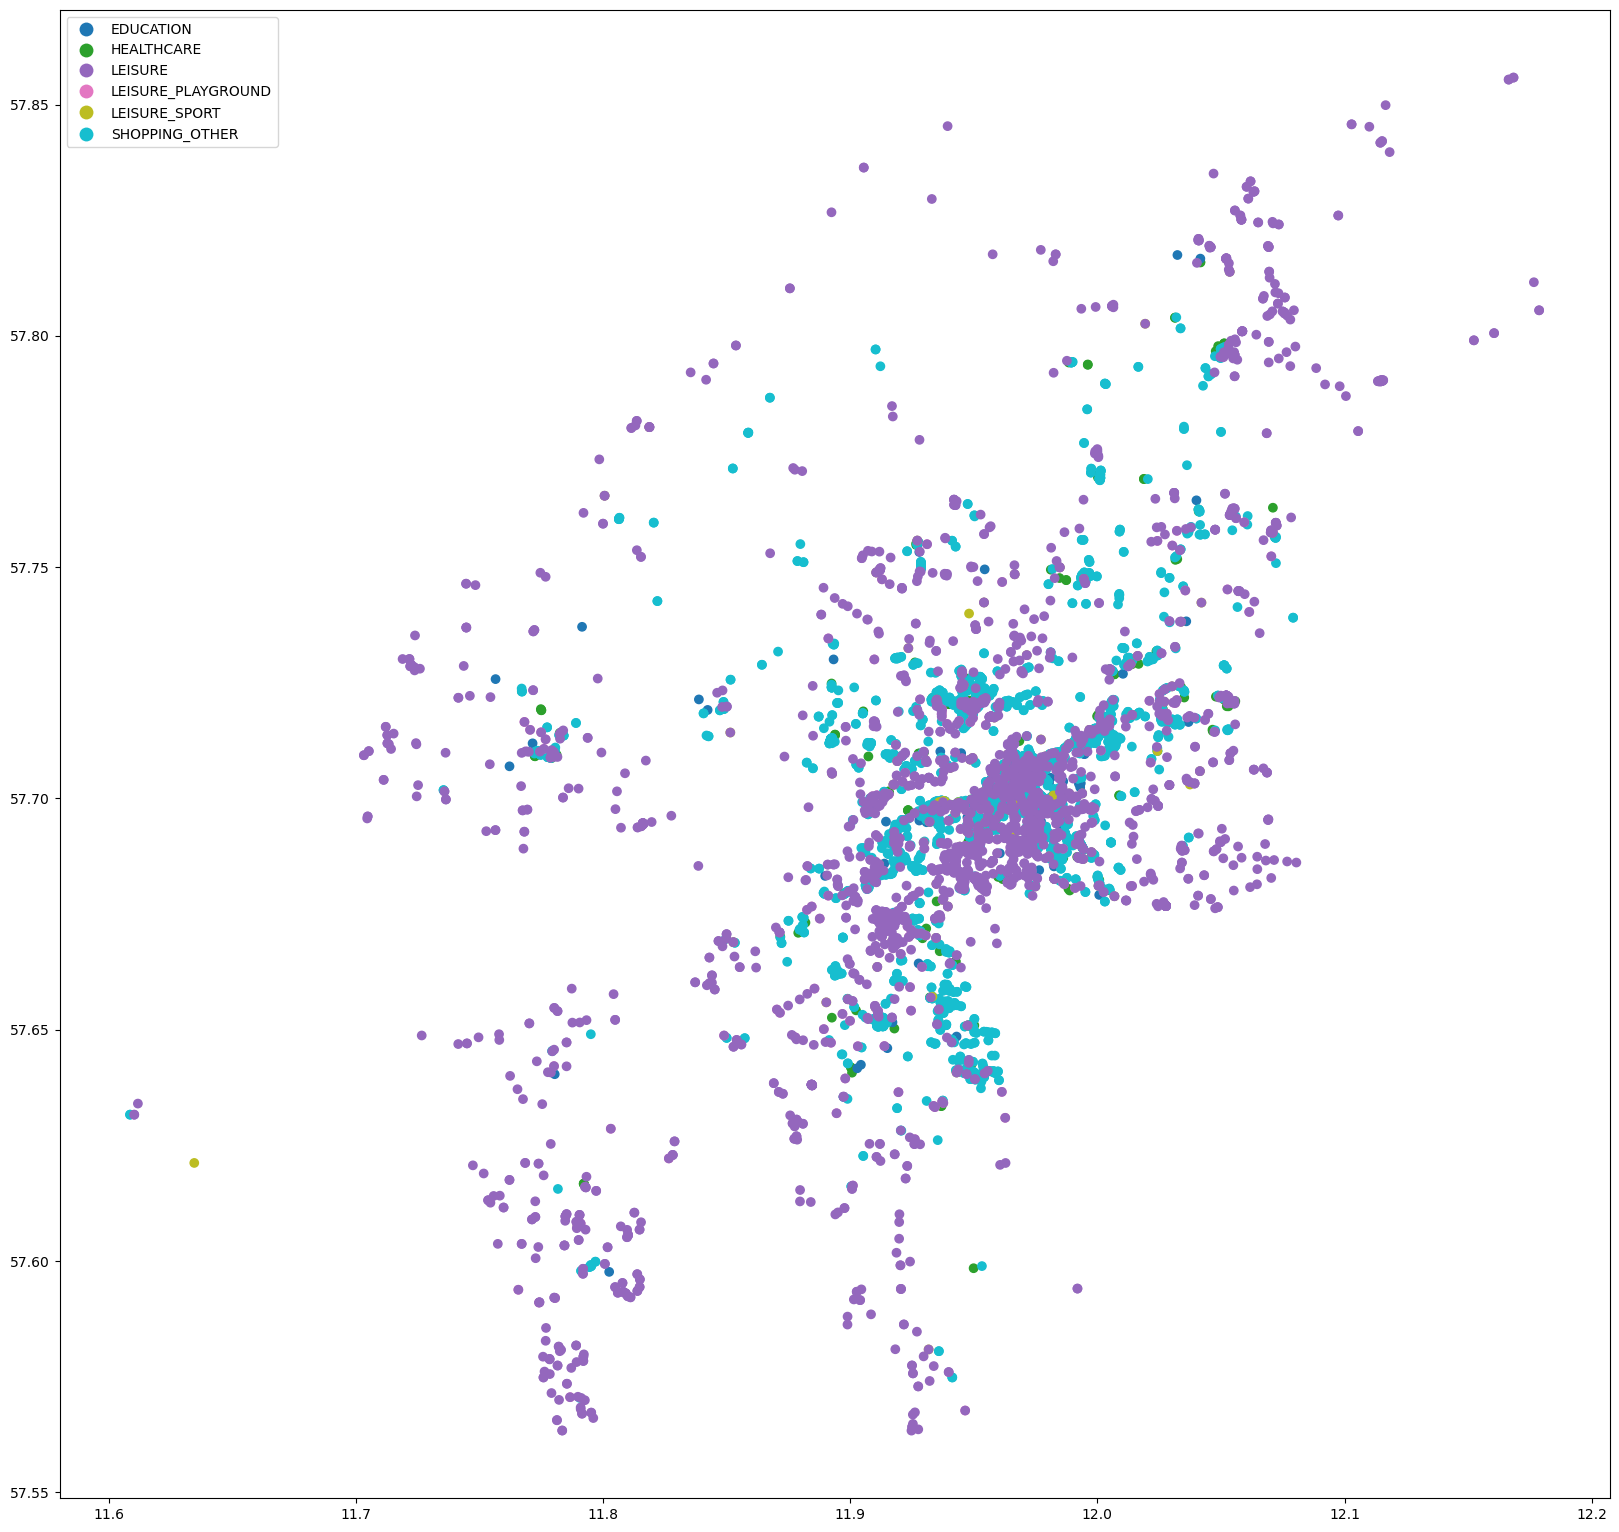

In [15]:
amenity_gdf.plot(column='activity', legend=True, figsize=(20, 20))

In [18]:
# Save the GeoDataFrame to the file
amenity_gdf.to_file(os.path.join(output_directory, 'OSM_AMENITY_POINTS.shp'), driver="ESRI Shapefile")

In [ ]:
"""/*
This has been generated by the overpass-turbo wizard.
The original search was:
“(amenity = 'supermarket' or amenity = 'convenience') and type:way”
*/
[out:json][timeout:25];
// gather results
(
  way["amenity"="supermarket"]({{bbox}});
  way["amenity"="convenience"]({{bbox}});
);
// print results
out geom;"""

In [8]:
import geopandas as gpd
# Shopping grocery variables
appended_data = gpd.read_file('data/osm/osm_result.json')
shape_old = appended_data.shape
appended_data = appended_data.drop_duplicates(subset=['id'])
print(f'dropped {shape_old[0]-appended_data.shape[0]} duplicates')
SHOPPING_grocery_variables = ['supermarket', 'convenience']

# If any from SHOPPING_grocery_variables then create a new GDF called gdf_shopping_grocery

gdf_shopping_grocery = appended_data[appended_data['sub_amenity'].isin(SHOPPING_grocery_variables)]

gdf_shopping_grocery.to_crs(epsg=3006, inplace=True)

dropped 204 duplicates


c:\Users\ssanjay\AppData\Local\Continuum\anaconda3\envs\tripsender\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [4]:
import tripsender.od as od
# Construct the SQL query
sql = "SELECT * FROM se_got_phy_buildingfootprint_lm"

# Fetch the data using the get_pg_query function
gdf = od.get_pg_query(sql, local=False, web=False)

In [9]:
# Find the buildings that contain the points from gdf_shopping_grocery
gdf_shopping_grocery_buildings = gpd.sjoin(gdf, gdf_shopping_grocery, how="inner", op='intersects')

In [14]:
gdf_shopping_grocery_buildings.columns

Index(['id_left', 'geom', 'objekt_id', 'objekt_ver', 'detaljtyp', 'adat',
       'insam_lage', 'xyfel', 'namn1', 'namn2', 'namn3', 'huvudbyggn',
       'andamal_1', 'andamal_1t', 'andamal_2', 'andamal_3', 'andamal_4',
       'andamal_5', 'andamal_6', 'andamal_7', 'andamal_8', 'andamal_9',
       'andamal_10', '_mean', 'height', 'index_right', 'type', 'id_right',
       'lat', 'lon', 'sub_amenity', 'name', 'query', 'area'],
      dtype='object')

In [13]:
gdf_shopping_grocery_buildings["area"] = gdf_shopping_grocery_buildings["geom"].area


In [19]:
gdf_shopping_grocery_buildings = gdf_shopping_grocery_buildings[["area","lat","lon"]]

In [20]:
# Add area column from gdf_shopping_grocery_buildings to gdf_shopping_grocery by joining on lat and lon
gdf_shopping_grocery = gdf_shopping_grocery.merge(gdf_shopping_grocery_buildings, on=["lat","lon"], how="left")

In [23]:
gdf_shopping_grocery.drop(columns=["type","id","lat","lon","query"], inplace=True)
gdf_shopping_grocery.rename(columns={"sub_amenity":"amenity"}, inplace=True)
gdf_shopping_grocery["activity"] = "SHOPPING_GROCERY"
# Save to shp
gdf_shopping_grocery.to_file('data/osm/OSM_AMENITY_SHOPPING_GROCERY.shp', driver="ESRI Shapefile")